## This notebook should read a clean dataset into a dataframe, do some exploration of the columns.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
clean_data_path = './Data-clean/Preprocessed_2015-2020_all_cols.csv'

## 1. Read a clean dataset into dataframe. Clean dataset by default should have these columns only:  
### tweets_Date  
### tweets_Text  
### tweets_Replies  
### tweets_Retweets  
### tweets_Likes  
### has_image  
### has_Link

In [4]:
data = pd.read_csv(clean_data_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20529 entries, 0 to 20528
Data columns (total 9 columns):
Unnamed: 0                 20529 non-null int64
tweets_Date                20529 non-null object
tweets_Likes               20529 non-null float64
tweets_Replies             20529 non-null float64
tweets_Retweets            20529 non-null float64
tweets_Text                19876 non-null object
has_image                  20529 non-null int64
has_Link                   20529 non-null int64
tweets_ResponseCategory    20529 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.4+ MB


In [6]:
data.head(5)

,Unnamed: 0,tweets_Date,tweets_Likes,tweets_Replies,tweets_Retweets,tweets_Text,has_image,has_Link,tweets_ResponseCategory
0,0,"Jan 28, 2016",276.0,49.0,147.0,NaN,1,0,0
1,1,"Jan 28, 2016",243.0,33.0,288.0,NaN,1,0,0
2,2,"Jan 28, 2016",180.0,17.0,202.0,police hunt still woman armed man near disneyl...,1,1,0
3,3,"Jan 28, 2016",291.0,37.0,360.0,french police arrest woman man carrying weapon...,1,1,0
4,4,"Jan 28, 2016",202.0,22.0,240.0,french police hunting woman armed man arrested...,1,1,0


## 2. Explore the columns a bit:

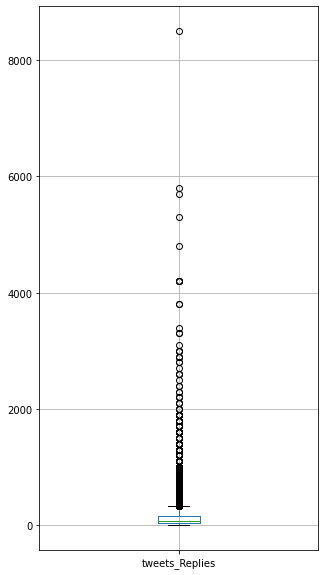

In [7]:
fig, ax = plt.subplots(figsize=(5,10))
data.boxplot('tweets_Replies')

In [8]:
data['tweets_Replies'].describe()

count    20529.000000
mean       143.091285
std        234.509784
min          1.000000
25%         41.000000
50%         76.000000
75%        155.000000
max       8500.000000
Name: tweets_Replies, dtype: float64

In [9]:
data['tweets_Likes'].describe()

count    20529.000000
mean       799.802182
std       1514.851257
min         22.000000
25%        253.000000
50%        411.000000
75%        770.000000
max      51000.000000
Name: tweets_Likes, dtype: float64

In [10]:
data['tweets_Retweets'].describe()

count    20529.000000
mean       465.594476
std        764.144918
min         14.000000
25%        167.000000
50%        281.000000
75%        503.000000
max      28100.000000
Name: tweets_Retweets, dtype: float64

In [24]:
data['tweets_ResponseCategory'].value_counts()

1    713
2    706
3    705
0    688
Name: tweets_ResponseCategory, dtype: int64